In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from glob import glob
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
folder=r'C:\Users\gjc10\Desktop\Greg_CCD\FlatsTest'

In [3]:
fits.info(folder+r'/flat1.fit')



Filename: C:\Users\gjc10\Desktop\Greg_CCD\FlatsTest/flat1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1391, 1039)   int16 (rescales to uint16)   


In [4]:
imagetest=fits.getdata(folder+ r'/flat1_342.fit')

252


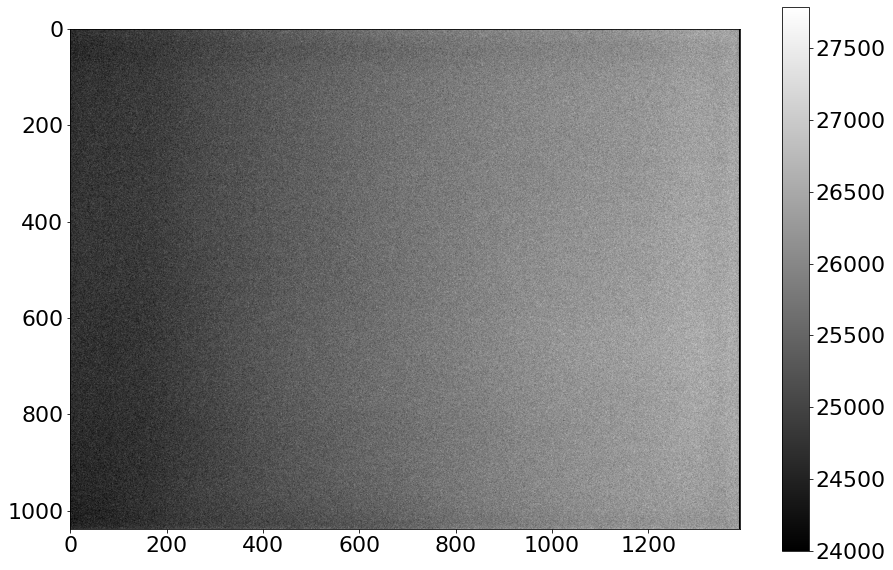

In [5]:
plt.imshow(imagetest,cmap='gray',vmin=24000)
plt.colorbar()
print(np.min(imagetest))

In [6]:
def Gaincalc(flats,biases):
    
    fav1=[]
    fav2=[]
    bav1=[]
    bav2=[]
    difflat=[]
    flatsig=[]
    biassig=[]
    gains=[]
    noises=[]
    i=0
    j=0
    k=0
    for file in flats[1::2]:
        fit1=fits.getdata(file)
        Sum1=np.sum(fit1[1000:1100,800:900])
        #print(fit1[1000:1100][800:900])
        avcount1=Sum1/1e+4
        #print(avcount1)
        fav1.append(avcount1)
    for file in flats[::2]:
        fit1=fits.getdata(file)
        Sum1=np.sum(fit1[1000:1100,800:900])
        #avcount1=Sum1/1e+4
        #print(avcount1)
        fav2.append(avcount1)
    for file in biases[1::2]:
        fit1=fits.getdata(file)
        Sum1=np.sum(fit1[1000:1100,800:900])
        avcount1=Sum1/1e+4
        #print(avcount1)
        bav1.append(avcount1)
    for file in biases[::2]:
        fit1=fits.getdata(file)
        Sum1=np.sum(fit1[1000:1100,800:900])
        avcount1=Sum1/1e+4
        bav2.append(avcount1)
    while i <=np.shape(flats)[0]-1:
        x0=fits.getdata(flats[i])
        x1=fits.getdata(flats[i+1])
        dif= np.asarray(x1.astype(float)[1000:1100,800:900]-np.asarray(x0.astype(float)[1000:1100,800:900]))
        std=np.std(dif)
        #print(std)
        flatsig.append(std)
        i+=2
    while j <=np.shape(biases)[0]-1:
        y0=fits.getdata(biases[j])
        y1=fits.getdata(biases[j+1])
        dif= np.asarray(y1.astype(float)[1000:1100,800:900])-np.asarray(y0.astype(float)[1000:1100,800:900])
        std=np.std(dif)
        biassig.append(std)
        j+=2
    while k <=np.shape(fav1)[0]-1:
        gain=((fav2[k]+fav1[k])-(bav1[k]+bav2[k]))/((flatsig[k])**2-(biassig[k])**2)
        readnoise=gain*(biassig[k]/np.sqrt(2))
        gains.append(gain)
        noises.append(readnoise)
        k+=1
    return gains, noises
    
        
        
        

In [7]:
flats=glob(folder+r'/flat3_*')
bias=glob(folder+r'/bias3_*')
print(bias)

['C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1001.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1011.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1021.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1031.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1041.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1051.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1061.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1071.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1081.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1091.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1101.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1111.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_1121.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_931.fit', 'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\bias3_941.fit', 'C:\\Users\

In [8]:
Gaincalc(flats,bias)

([0.10733916870469318,
  0.10589661742095073,
  0.10642320766114276,
  0.11088815323721814,
  0.11221121174066423,
  0.10863266748802645,
  0.10474663832597594,
  0.10716792891475123,
  0.10832406638217064,
  0.11002028086594061],
 [1.4534631360988344,
  1.439438405686472,
  1.4496716660661901,
  1.4909588445562276,
  1.5163305929132815,
  1.4719431172841215,
  1.440948742827488,
  1.4518207522815312,
  1.4523586181257724,
  1.4851653265182716])

In [9]:
flats[19]

'C:\\Users\\gjc10\\Desktop\\Greg_CCD\\FlatsTest\\flat3_922.fit'

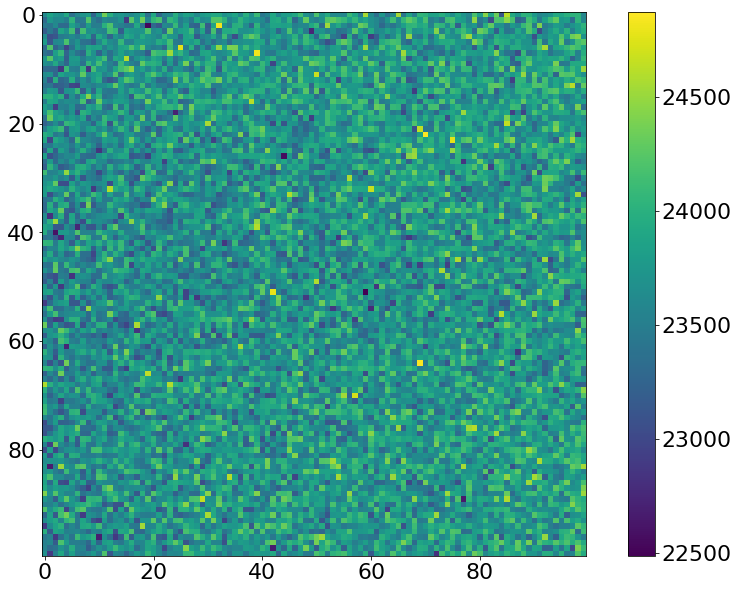

In [10]:
fit1=fits.getdata(flats[0])
plt.imshow(fit1[0:100,0:100])
plt.colorbar()

In [11]:
f5=glob(folder+r'\5f_*')
b5=glob(folder+r'\5b_*')
f55=glob(folder+r'\5.5f_*')
b55=glob(folder+r'\5.5b_*')
f6=glob(folder+r'\6f_*')
b6=glob(folder+r'\6b_*')
f65=glob(folder+r'\6.5f_*')
b65=glob(folder+r'\6.5b_*')
f7=glob(folder+r'\7f_*')
b7=glob(folder+r'\7b_*')
f75=glob(folder+r'\7.5af_*')
b75=glob(folder+r'\7.5ab_*')
f8=glob(folder+r'\flat3_*')
b8=glob(folder+r'\bias3_*')
f85=glob(folder+r'\8.5f_*')
b85=glob(folder+r'\8.5b_*')
f9=glob(folder+r'\9f_*')
b9=glob(folder+r'\9b_*')


In [12]:
for el in b75:
    print(fits.getheader(el)['CCD-Temp'])

-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5
-7.5


In [13]:
GainAll=[np.average(Gaincalc(f5,b5)[0]),np.average(Gaincalc(f55,b55)[0]),np.average(Gaincalc(f6,b6)[0]),\
         np.average(Gaincalc(f65,b65)[0]),np.average(Gaincalc(f7,b7)[0]),np.average(Gaincalc(f75,b75)[0]),\
         np.average(Gaincalc(f8,b8)[0]),np.average(Gaincalc(f85,b85)[0]),np.average(Gaincalc(f9,b9)[0])]
GainSTDs=[np.std(Gaincalc(f5,b5)[0]),np.std(Gaincalc(f55,b55)[0]),np.std(Gaincalc(f6,b6)[0]),\
         np.std(Gaincalc(f65,b65)[0]),np.std(Gaincalc(f7,b7)[0]),np.std(Gaincalc(f75,b75)[0]),\
         np.std(Gaincalc(f8,b8)[0]),np.std(Gaincalc(f85,b85)[0]),np.std(Gaincalc(f9,b9)[0])]


Text(0, 0.5, 'Gain')

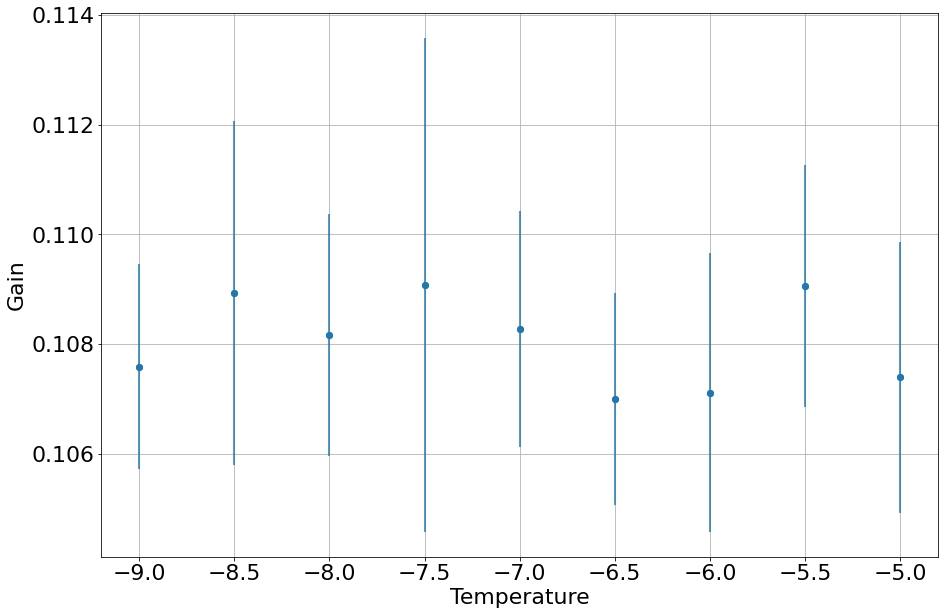

In [14]:
plt.scatter([-5,-5.5,-6,-6.5,-7,-7.5,-8,-8.5,-9],GainAll)
plt.errorbar([-5,-5.5,-6,-6.5,-7,-7.5,-8,-8.5,-9],GainAll,yerr=GainSTDs,fmt='o')
plt.grid(True)
plt.xlabel('Temperature' )
plt.ylabel('Gain')

In [15]:
NoiseAll=[np.average(Gaincalc(f5,b5)[1]),np.average(Gaincalc(f55,b55)[1]),np.average(Gaincalc(f6,b6)[1]),\
         np.average(Gaincalc(f65,b65)[1]),np.average(Gaincalc(f7,b7)[1]),np.average(Gaincalc(f75,b75)[1]),\
         np.average(Gaincalc(f8,b8)[1]),np.average(Gaincalc(f85,b85)[1]),np.average(Gaincalc(f9,b9)[1])]
NoiseSTDs=[np.std(Gaincalc(f5,b5)[1]),np.std(Gaincalc(f55,b55)[1]),np.std(Gaincalc(f6,b6)[1]),\
         np.std(Gaincalc(f65,b65)[1]),np.std(Gaincalc(f7,b7)[1]),np.std(Gaincalc(f75,b75)[1]),\
         np.std(Gaincalc(f8,b8)[1]),np.std(Gaincalc(f85,b85)[1]),np.std(Gaincalc(f9,b9)[1])]


Text(0, 0.5, 'Noise')

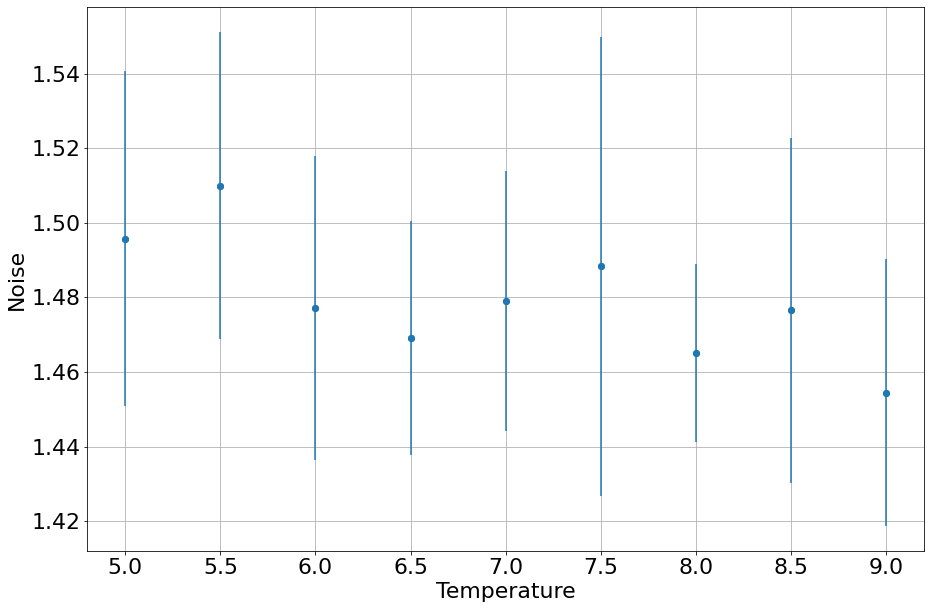

In [16]:
plt.errorbar([5,5.5,6,6.5,7,7.5,8,8.5,9],NoiseAll,yerr=NoiseSTDs,fmt='o')
plt.scatter([5,5.5,6,6.5,7,7.5,8,8.5,9],NoiseAll)
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Noise')

In [17]:
HgSpec=fits.getdata(folder+r'\HGSpec.fit')
HgSpec2=fits.getdata(folder+r'\HGSpec2.fit')
np.shape(HgSpec)

(1039, 1391)

In [18]:
def Gaussian(x,mu,sig,amp,const):
    return const+amp*np.exp((-(x-mu)**2)/2*sig**2)

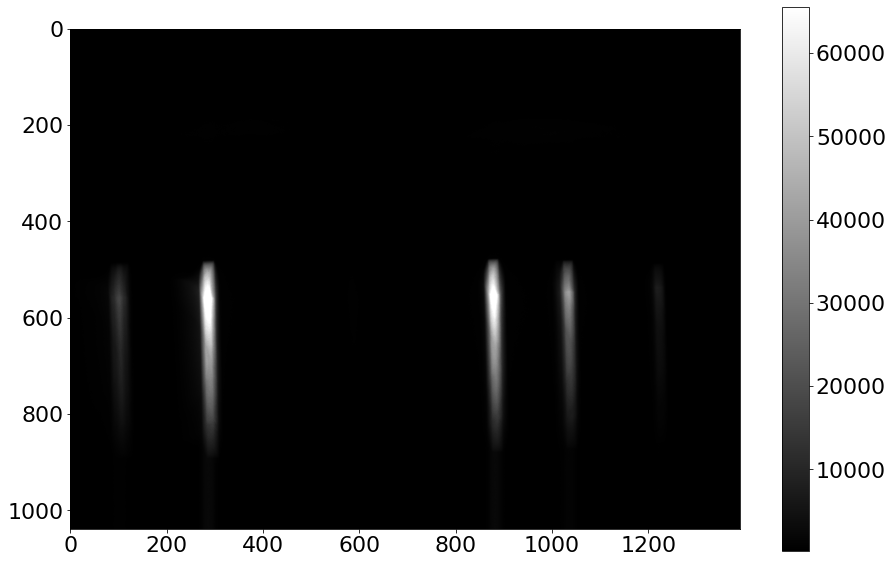

In [19]:
plt.imshow(HgSpec,cmap='gray',vmin=239)
plt.colorbar()

In [20]:
def SpecFunc(spec):
    sums=[]
    i=0
    while i<=1390:
        sums.append(np.sum(spec[::,i]))
        i+=1
    return sums

    

In [21]:
np.shape(HgSpec[::,1])
colspace=np.linspace(0,1390,1391)

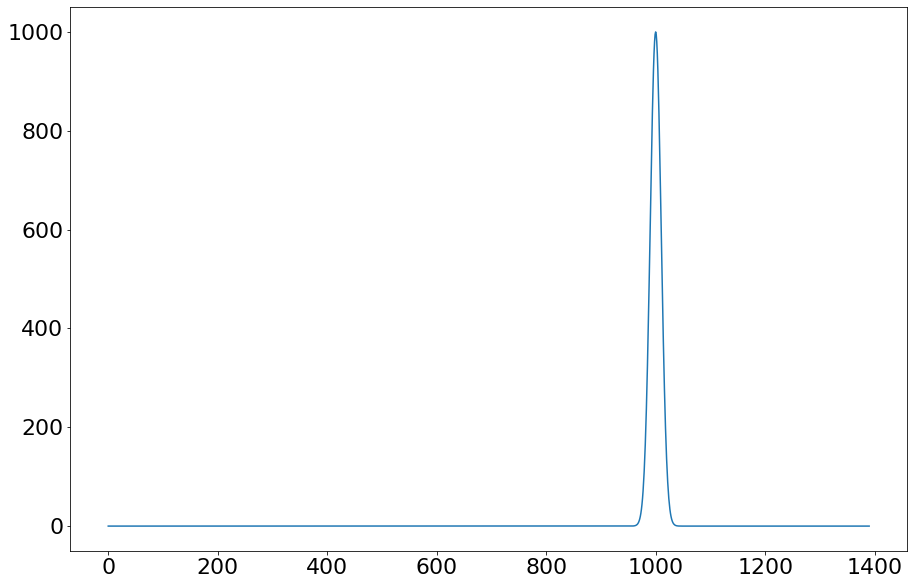

In [22]:
plt.plot(colspace,Gaussian(colspace,1000,1e-1,1000,0))

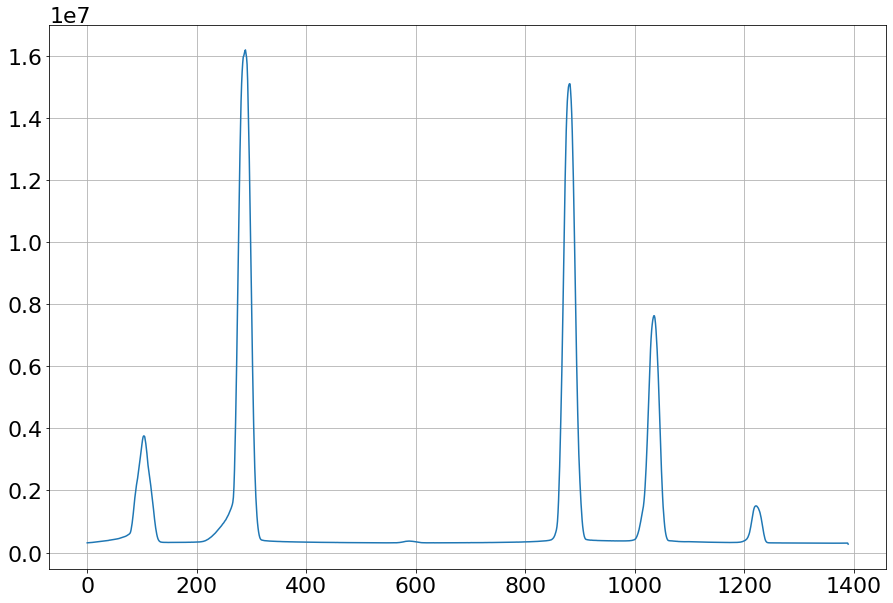

In [23]:
counts=SpecFunc(HgSpec)
plt.plot(counts)
plt.grid(True)

65535


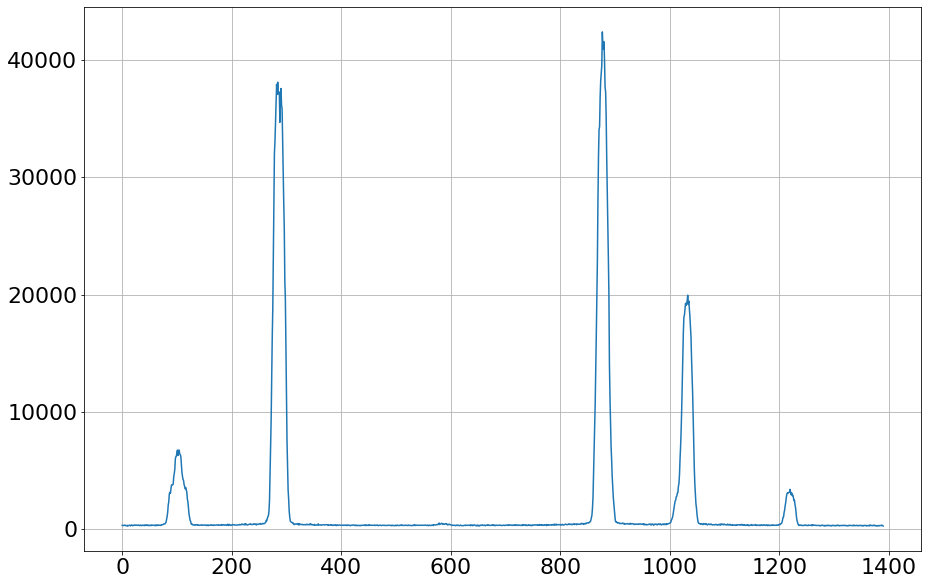

In [24]:
plt.plot(colspace,HgSpec[500])
plt.grid(True)
print(np.max(HgSpec[600]))
#plt.xlim(1200,1300)
#plt.ylim(0,5000)
#first between 75 and 130
#second 260 and 315
#third 840 and 910
#fourth 1000 and 1060
#fifth 1200 and 1240



In [25]:
g1,dg1=curve_fit(Gaussian,colspace[75:130],HgSpec[500][75:130],p0=[100,1e-1,1000,0])
g2,dg2=curve_fit(Gaussian,colspace[260:315],HgSpec[500][260:315],p0=[300,1e-1,10000,0])
g3,dg3=curve_fit(Gaussian,colspace[840:910],HgSpec[500][840:910],p0=[850,0.01,20000,0])
g4,dg4=curve_fit(Gaussian,colspace[1000:1060],HgSpec[500][1000:1060],p0=[1025,0.01,10000,0])
g5,dg5=curve_fit(Gaussian,colspace[1200:1240],HgSpec[500][1200:1240],p0=[1220,1e-1,1000,0])

102.34565146956497 286.1828402717187 877.8345708415341 1031.8587403384329 1219.7454872632345
0.08461338185355083 -0.10690921782702817 0.11689168128113599 0.11971739311190564 0.11688387775696361


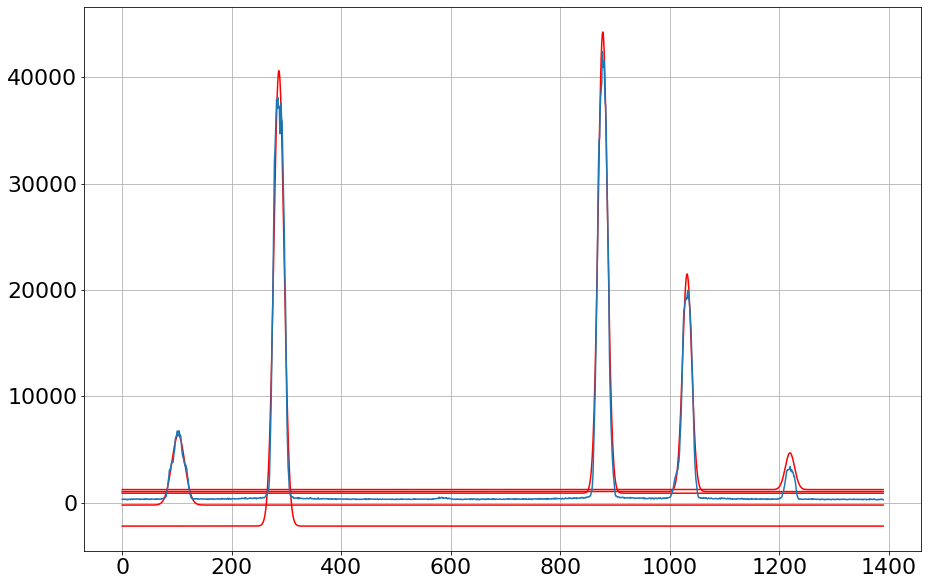

In [26]:
plt.plot(colspace,Gaussian(colspace,g1[0],g1[1],g1[2],g1[3]),color='r')
plt.plot(colspace,Gaussian(colspace,g2[0],g2[1],g2[2],g2[3]),color='r')
plt.plot(colspace,Gaussian(colspace,g3[0],g3[1],g3[2],g3[0]),color='r')
plt.plot(colspace,Gaussian(colspace,g4[0],g4[1],g4[2],g4[0]),color='r')
plt.plot(colspace,Gaussian(colspace,g5[0],g5[1],g5[2],g5[0]),color='r')
plt.plot(colspace,HgSpec[500])
plt.grid(True)
#plt.xlim(70,130)
#plt.ylim(0,10000)
print(g1[0],g2[0],g3[0],g4[0],g5[0])
print(g1[1],g2[1],g3[1],g4[1],g5[1])

In [27]:
def linfit(x,a,b):
    return a*x+b
cal1,dcal1=curve_fit(linfit,[g1[0],g2[0],g3[0],g4[0],g5[0]],[579,546,436,405,365])

[-1.90071184e-01  5.99932842e+02]
[[0.00278763        nan]
 [       nan 2.30396425]]


<ipython-input-38-c30812097a62>:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(dcal1))


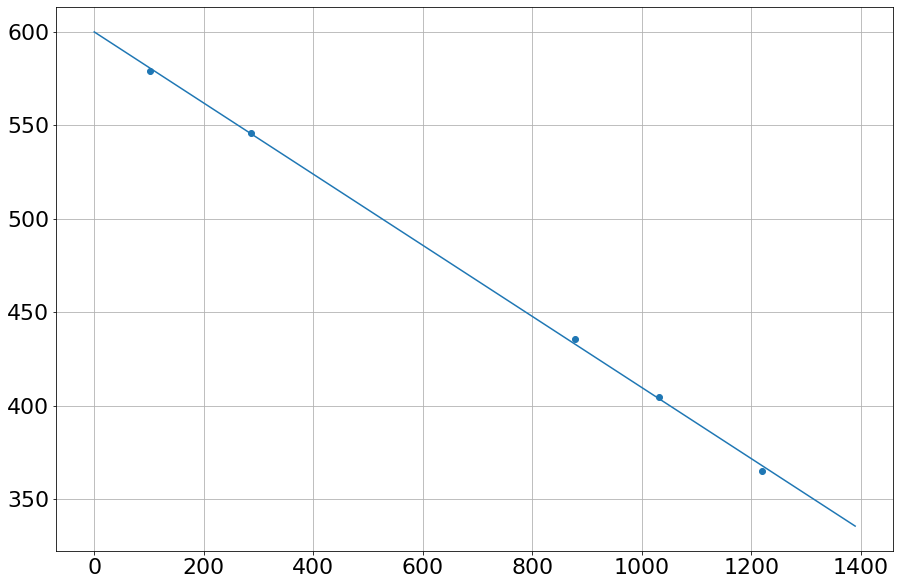

In [38]:
plt.scatter([g1[0],g2[0],g3[0],g4[0],g5[0]],[579,546,436,405,365])
plt.plot(colspace,linfit(colspace,cal1[0],cal1[1]))
print(cal1)
print(np.sqrt(dcal1))
plt.grid(True)

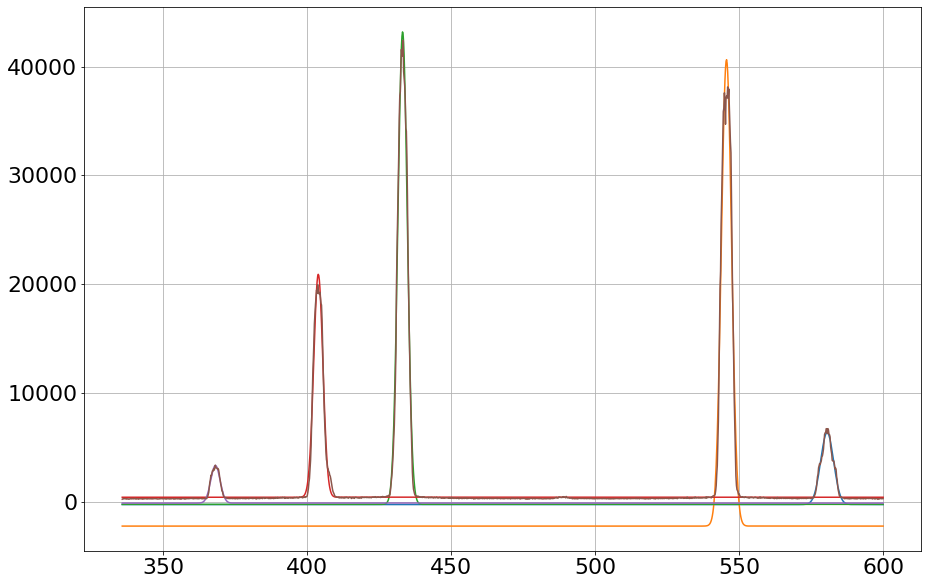

In [63]:
plt.plot(linfit(colspace,cal1[0],cal1[1]),Gaussian(colspace,g1[0],g1[1],g1[2],g1[3]))
plt.plot(linfit(colspace,cal1[0],cal1[1]),Gaussian(colspace,g2[0],g2[1],g2[2],g2[3]))
plt.plot(linfit(colspace,cal1[0],cal1[1]),Gaussian(colspace,g3[0],g3[1],g3[2],g3[3]))
plt.plot(linfit(colspace,cal1[0],cal1[1]),Gaussian(colspace,g4[0],g4[1],g4[2],g4[3]))
plt.plot(linfit(colspace,cal1[0],cal1[1]),Gaussian(colspace,g5[0],g5[1],g5[2],g5[3]))
plt.plot(linfit(colspace,cal1[0],cal1[1]),HgSpec[500])
plt.grid(True)
#plt.xlim(360,390)
#plt.ylim(0,10000)

In [30]:
Calibration1=fits.getdata(folder+r'\HGCal.fit')
Calibration2=fits.getdata(folder+r'\HGCal2.fit')
Calibration3=fits.getdata(folder+r'\HGCal3.fit')

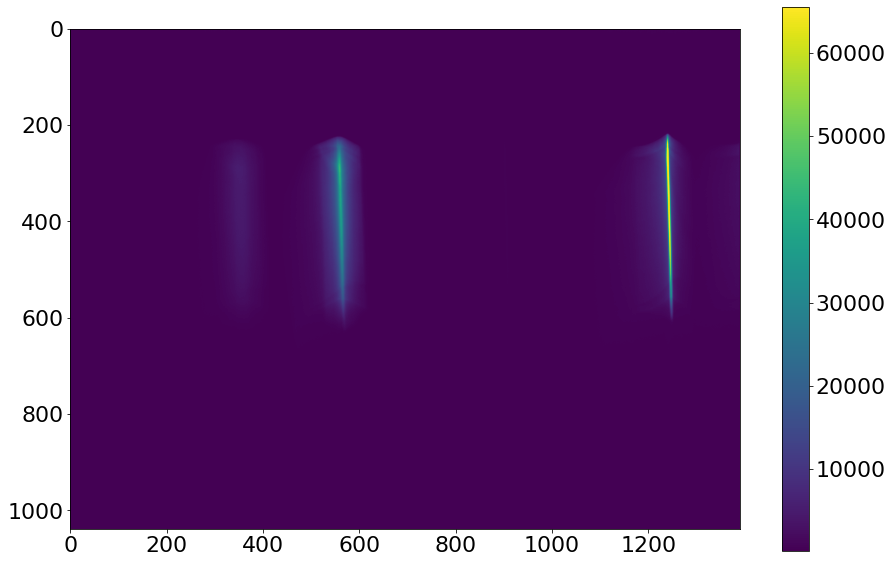

In [31]:
plt.imshow(Calibration1)
plt.colorbar()

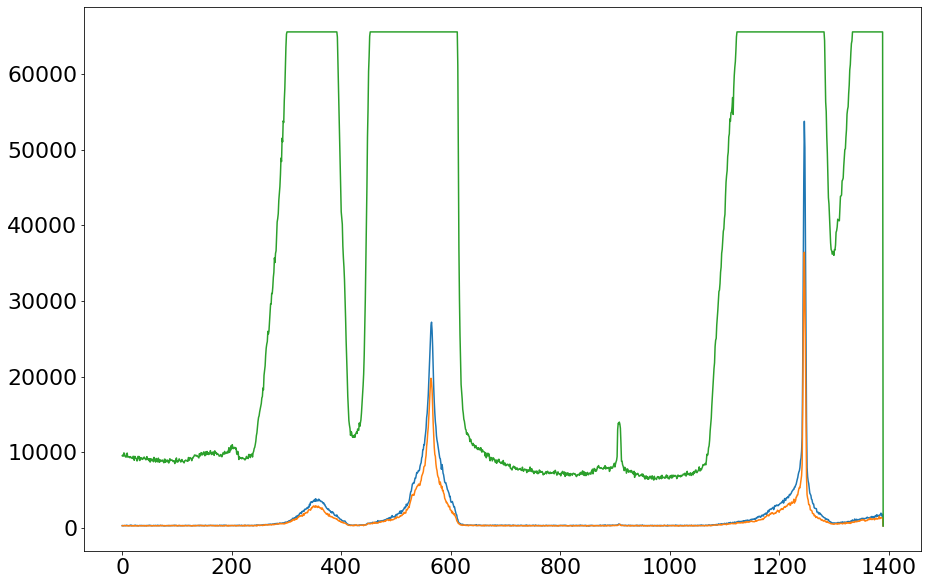

In [32]:
plt.plot(colspace,Calibration1[500])
plt.plot(colspace,Calibration2[500])
#plt.xlim(1200,1300)
#plt.ylim(0,30000)
#first at 260,420
#second at 475,625
#third at 1200,1300

plt.plot(colspace,Calibration3[500])

In [33]:
g6,dg6=curve_fit(Gaussian,colspace[260:420],Calibration2[500][260:420],p0=[300,1e-2,1000,0])
g7,dg7=curve_fit(Gaussian,colspace[475:625],Calibration2[500][475:625],p0=[550,1e-2,20000,1000])
g8,dg8=curve_fit(Gaussian,colspace[1200:1300],Calibration2[500][1200:1300],p0=[1250,1e-1,10000,0])

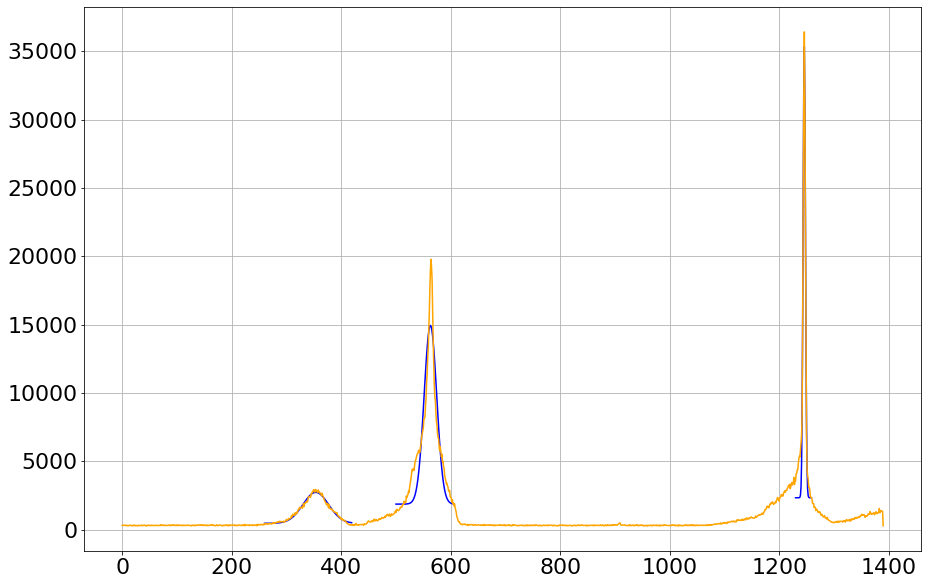

In [34]:
plt.plot(colspace[260:420],Gaussian(colspace,g6[0],g6[1],g6[2],g6[3])[260:420],color='b')
plt.plot(colspace[500:605],Gaussian(colspace,g7[0],g7[1],g7[2],g7[3])[500:605],color='b')
plt.plot(colspace[1230:1260],Gaussian(colspace,g8[0],g8[1],g8[2],g8[3])[1230:1260],color='b')
plt.plot(colspace,Calibration2[500],color='orange')
plt.grid(True)
#plt.xlim(1200,1300)

[[0.00067003        nan]
 [       nan 0.54627756]]
[-1.60445580e-01  6.35980227e+02]


<ipython-input-35-c890b33e6480>:5: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(dcal2))


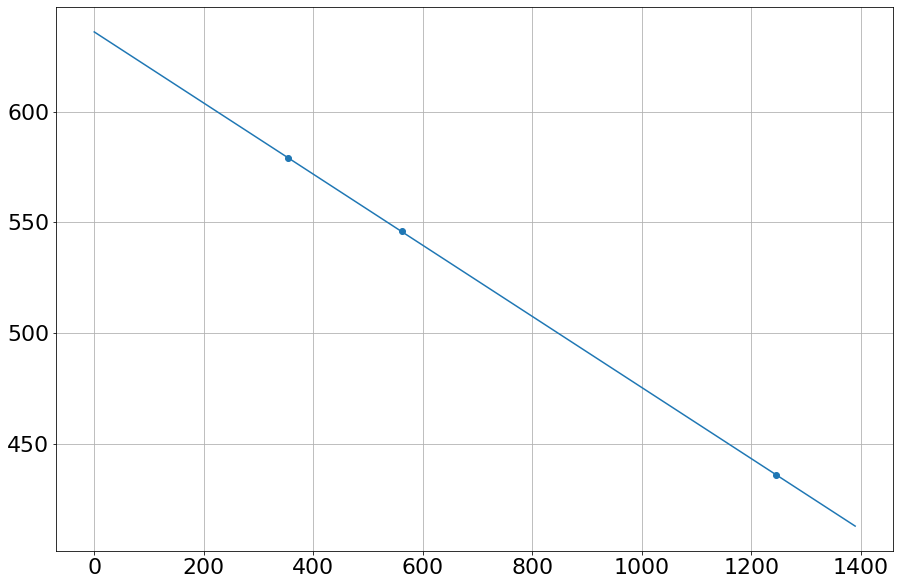

In [35]:
plt.scatter([g6[0],g7[0],g8[0]],[579,546,436])
cal2,dcal2=curve_fit(linfit,[g6[0],g7[0],g8[0]],[579,546,436])
plt.plot(colspace,linfit(colspace,cal2[0],cal2[1]))
plt.grid(True)
print(np.sqrt(dcal2))
print(cal2)

45714


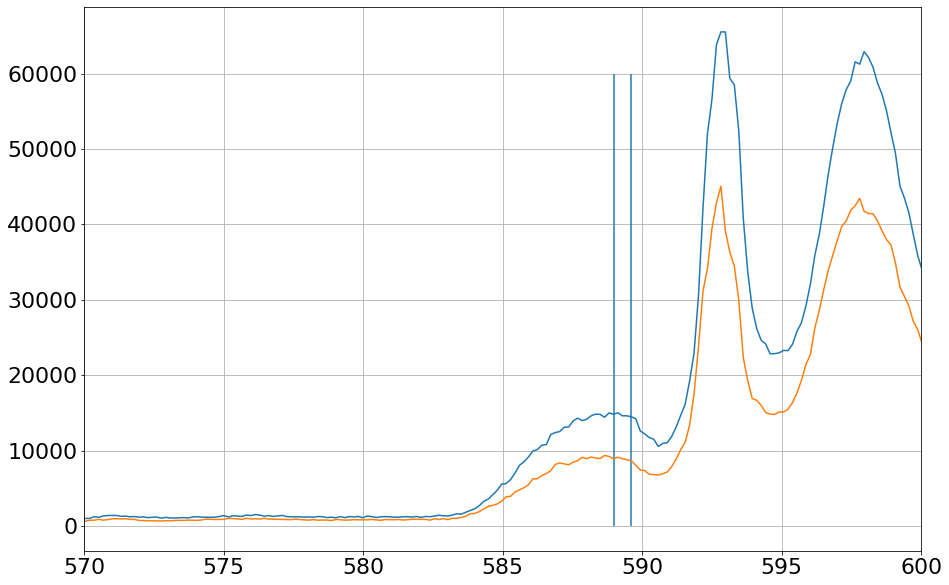

In [43]:
NaLow=fits.getdata(folder+r'\NaShort5.fit')
NaLow2=fits.getdata(folder+r'\NaShort6.fit')
NaLow3=fits.getdata(folder+r'\NaShort7.fit')
plt.plot(linfit(colspace,cal2[0],cal2[1]),NaLow3[500])
plt.plot(linfit(colspace,cal2[0],cal2[1]),NaLow2[500])
plt.grid(True)
plt.xlim(570,600)
plt.vlines(x=[589,589.6],ymin=0,ymax=60000)
print(np.max(NaLow[500]))

C:\Users\gjc10\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


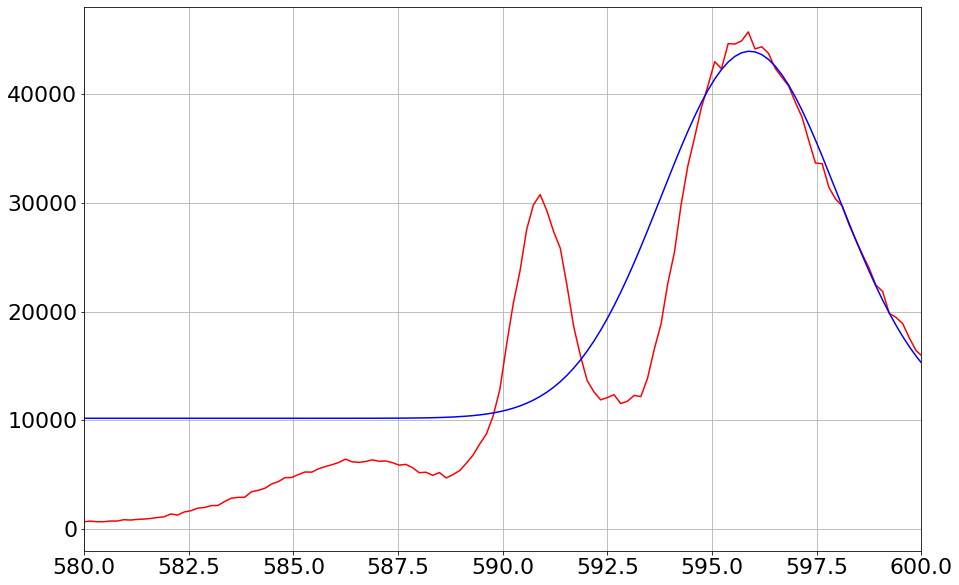

In [60]:
plt.plot(linfit(colspace,cal2[0],cal2[1]),NaLow[500],color='r')
plt.xlim(580,600)
plt.grid(True)
Na1,dNa1=curve_fit(Gaussian,colspace[210:260],NaLow[500][210:260],p0=[230,1e-1,10000,10000])
Na2,dNa2=curve_fit(Gaussian,colspace[260:280],NaLow[500][260:280],p0=[270,0.01,20000,10000])
plt.plot(linfit(colspace,cal2[0],cal2[1]),Gaussian(colspace,Na1[0],Na1[1],Na1[2],Na1[3]),color='b')

#plt.plot(linfit(colspace,cal2[0],cal2[1]),Gaussian(colspace,Na2[0],Na2[1],Na2[2],Na2[3]),color='b')
#print(cal2[0]*Na1[0]+cal2[1])
#print(cal2[0]*Na2[0]+cal2[1])
#print(linfit([Na1[0],Na2[0]],cal2[0],cal2[1]))
#first at 210,260
#second at 260 280


In [ ]:
counts1=SpecFunc(NaLow2)
plt.plot(linfit(colspace,cal2[0],cal2[1]),counts1)
plt.grid(True)
plt.xlim(570,595)

In [ ]:
HGCal=fits.getdata(folder+r'\HgCal.fit')
HGCal2=fits.getdata(folder+r'\HgCal2.fit')
HGCal3=fits.getdata(folder+r'\HgCal3.fit')
plt.plot(HGCal[400])
plt.plot(HGCal2[400])
#plt.plot(HGCal3[600])

In [ ]:
plt.plot(HGCal3[400])

In [ ]:
plt.imshow(NaLow)
plt.colorbar()

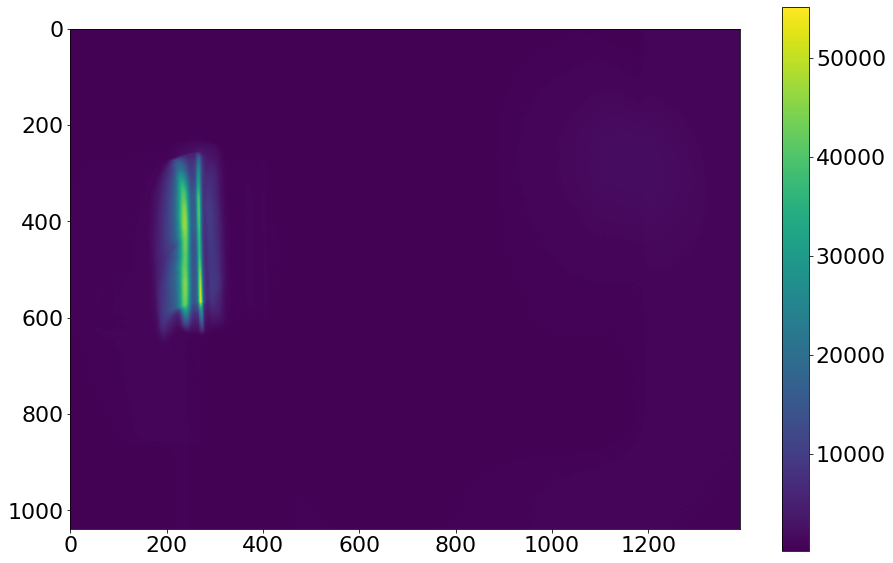

In [44]:
view1=fits.getdata(folder+r'\NaShort6.fit')
view2=fits.getdata(folder+r'\NaLong3.fit')
view3=fits.getdata(folder+r'\NaLong4.fit')
plt.imshow(view1)
plt.colorbar()

In [ ]:
#plt.plot(linfit(colspace,cal2[0],cal2[1]),view1[400].astype(float)+view2[400].astype(float)+view3[400].astype(float))
plt.plot(colspace,view2[400])
plt.plot(colspace,view1[400])
plt.grid(True)
#plt.xlim(550,580)


In [ ]:
Na3,dNa3=curve_fit(Gaussian,colspace[345:400],view2[400][345:400],p0=[380,0.1,25000,1000],bounds=(0,np.inf))
Na4,dNa4=curve_fit(Gaussian,colspace[400:440],view2[400][400:440],p0=[420,0.1,25000,10000],bounds=(0,np.inf))
Na5,dNa5=curve_fit(Gaussian,colspace[700:800],view1[400][700:800],p0=[750,0.1,5000,10000],bounds=(0,np.inf))
Na6,dNa6=curve_fit(Gaussian,colspace[800:900],view1[400][800:900],p0=[850,0.2,32000,10000],bounds=(0,np.inf))

In [ ]:
plt.plot(colspace,Gaussian(colspace,Na3[0],Na3[1],Na3[2],Na3[3]))
plt.plot(colspace,Gaussian(colspace,Na4[0],Na4[1],Na4[2],Na4[3]))
plt.plot(colspace,Gaussian(colspace,Na5[0],Na5[1],Na5[2],Na5[3]))
plt.plot(colspace,Gaussian(colspace,Na6[0],Na6[1],Na6[2],Na6[3]))
#plt.plot(colspace,Gaussian(colspace,382,0.15,26000,25000))
print(Na3)
print(Na4)
plt.plot(colspace,view1[400])
#plt.xlim(800,900)
#first at 382

In [ ]:
plt.scatter([Na3[0],Na4[0],Na5[0],Na6[0]],[574.4,568.8,516,507])
cal3,dcal3=curve_fit(linfit,[Na3[0],Na4[0],Na5[0],Na6[0]],[574.4,568.8,516,507])
plt.plot(colspace,linfit(colspace,cal3[0],cal3[1]))

In [ ]:
plt.plot(linfit(colspace,cal3[0],cal3[1]),NaLow[400],color='r')
print(cal3[0]*Na1[0]+cal3[1])
print(cal3[0]*Na2[0]+cal3[1])

In [ ]:
plt.plot(colspace,NaLow[400],color='r')
#plt.xlim(210,255)
#plt.xlim(260,275)
Na7,dNa7=curve_fit(Gaussian,colspace[210:255],NaLow[400][210:255],p0=[230,0.001,20000,15000])
Na8,dNa8=curve_fit(Gaussian,colspace[260:275],NaLow[400][260:275],p0=[270,0.01,20000,15000])
plt.plot(colspace,Gaussian(colspace,Na7[0],Na7[1],Na7[2],Na7[3]))
plt.plot(colspace,Gaussian(colspace,Na8[0],Na8[1],Na8[2],Na8[3]))
plt.xlim(170,300)

In [ ]:
plt.scatter([Na7[0],Na8[0]],[589.592,588.995])
calNa,dcalNa=curve_fit(linfit,[Na7[0],Na8[0]],[589.592,588.995])
plt.plot(colspace,linfit(colspace,calNa[0],calNa[1]))
print(calNa)
#Not particularly meaningful calibration but want to see what spectrum looks like

In [ ]:
plt.plot(linfit(colspace,calNa[0],calNa[1]),view2[400])
plt.grid(True)
#plt.xlim(582,585)
#This doesnt really align well with either NaI or NaII

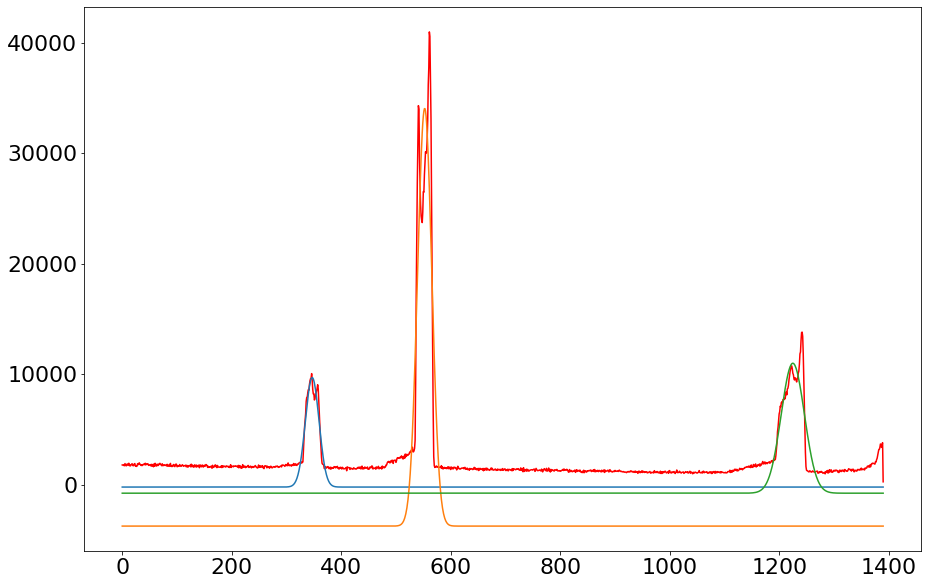

In [65]:
NewHg=fits.getdata(folder+r'\HGCalNew.fit')
plt.plot(colspace,NewHg[600],color='r')
NHG1,dNHG1=curve_fit(Gaussian,colspace[320:370],NewHg[600][320:370],p0=[350,0.1,10000,100])
NHG2,dNHG2=curve_fit(Gaussian,colspace[520:580],NewHg[600][520:580],p0=[560,0.1,40000,100])
NHG3,dNHG3=curve_fit(Gaussian,colspace[1180:1260],NewHg[600][1180:1260],p0=[1200,0.01,10000,100])
plt.plot(colspace,Gaussian(colspace,NHG1[0],NHG1[1],NHG1[2],NHG1[3]))
plt.plot(colspace,Gaussian(colspace,NHG2[0],NHG2[1],NHG2[2],NHG2[3]))
plt.plot(colspace,Gaussian(colspace,NHG3[0],NHG3[1],NHG3[2],NHG3[3]))
#plt.xlim(320,370)
#plt.ylim(0,10000)
#plt.xlim(520,580)
#plt.xlim(1180,1260)

[-1.63050936e-01  6.35801184e+02]
0.4503820191315355


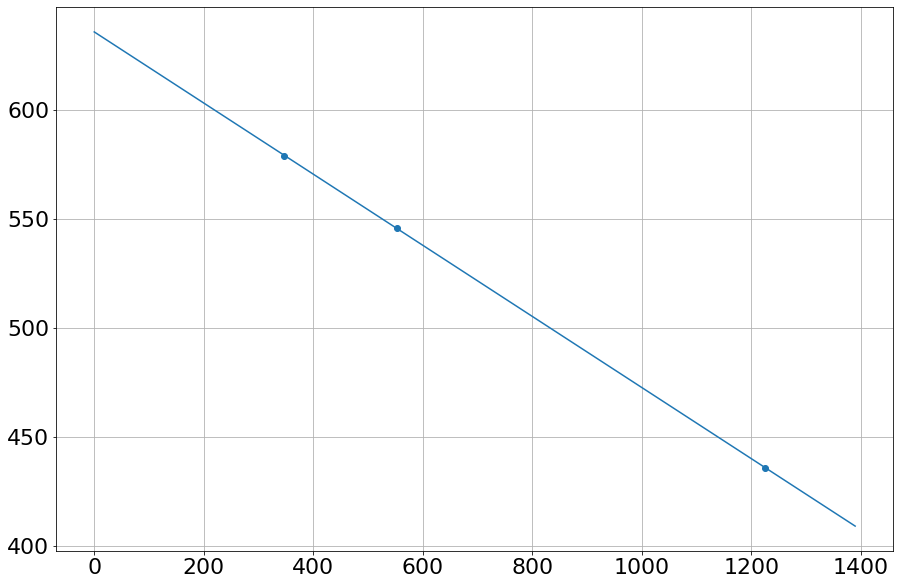

In [66]:
plt.scatter([NHG1[0],NHG2[0],NHG3[0]],[579,546,436])
Newcal,dNewcal=curve_fit(linfit,[NHG1[0],NHG2[0],NHG3[0]],[579,546,436])
plt.plot(colspace,linfit(colspace,Newcal[0],Newcal[1]))
plt.grid(True)
print(Newcal)
print(np.sqrt(dNewcal[1,1]))

In [67]:
NewNa=fits.getdata(folder+r'\NaNew2.fit')

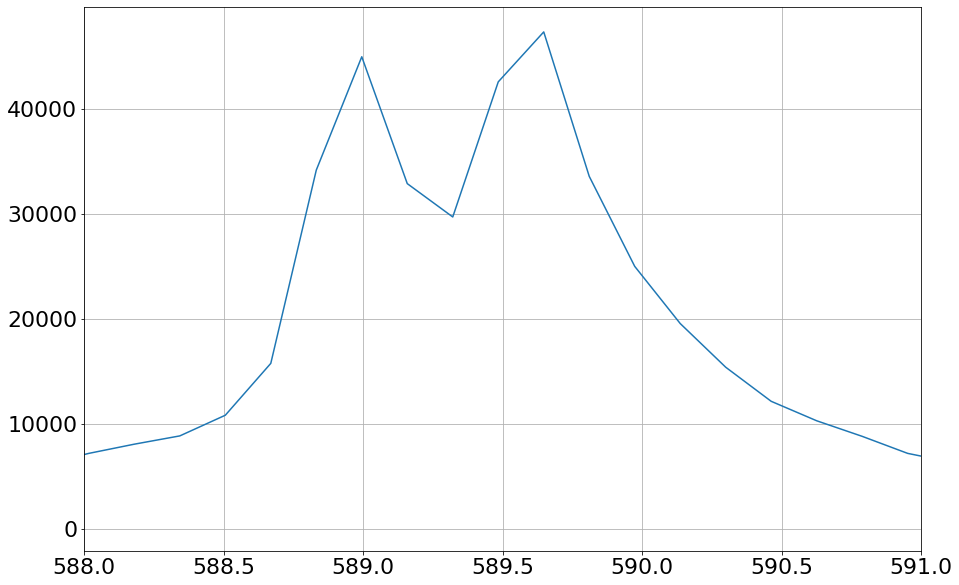

In [68]:
plt.plot(linfit(colspace,Newcal[0],Newcal[1]-4.25),NewNa[400])
plt.xlim(588,591)
plt.grid(True)


In [45]:
NaOld=fits.getdata(folder+r'\NaNew2.fit')

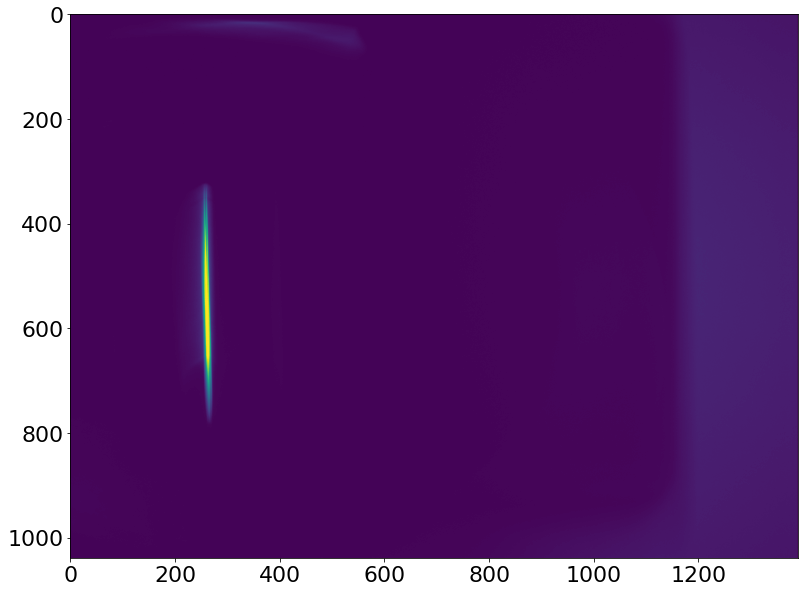

In [46]:
plt.imshow(NaOld)


In [64]:
plt.plot(linfit(colspace,Newcal[0],Newcal1[1]),NaOld[400])
plt.xlim(550,560)
plt.grid(True)

NameError: name 'Newcal' is not defined